In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

#### AM DSB-TC
Ampitude Modulation Double Side Band Transmitted Carrier

In [23]:
fs = int(1e6)
ts = 1 / fs
t = np.arange(0, 1, ts)
passo_f = 1
f = np.arange(-fs / 2, fs / 2, passo_f)

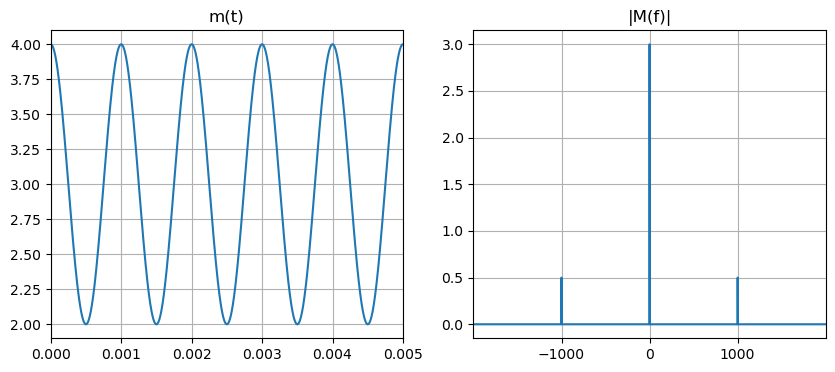

In [24]:
fm = int(1e3)
Am = 1
A0 = 3
m_t = Am * np.cos(2 * np.pi * fm * t) + A0
M_f = np.fft.fftshift(np.fft.fft(m_t) / len(m_t))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t, m_t)
plt.title("m(t)")
plt.grid()
plt.xlim(0, 5 * (1 / fm))

plt.subplot(122)
plt.plot(f, np.abs(M_f))
plt.title("|M(f)|")
plt.grid()
plt.xlim(-2 * fm, 2 * fm)
plt.xticks([-fm, 0, fm])

plt.show()

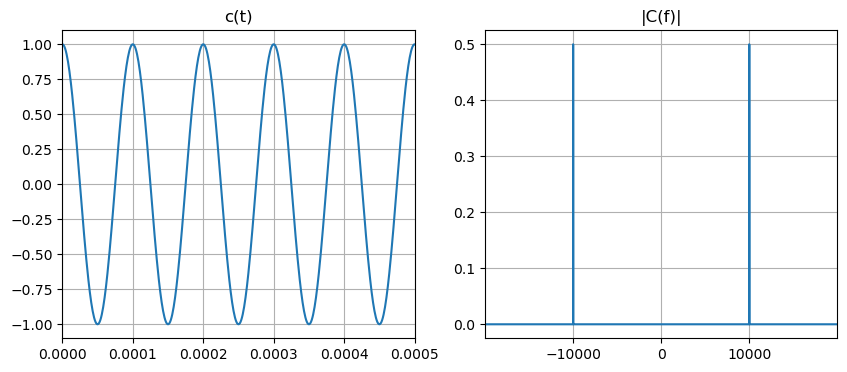

In [25]:
fc = int(10e3)
Ac = 1
c_t = Ac * np.cos(2 * np.pi * fc * t)
C_f = np.fft.fftshift(np.fft.fft(c_t) / len(c_t))

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, c_t)
plt.title("c(t)")
plt.grid()
plt.xlim(0, 5 * (1 / fc))

plt.subplot(122)
plt.plot(f, np.abs(C_f))
plt.title("|C(f)|")
plt.grid()
plt.xlim(-2 * fc, 2 * fc)
plt.xticks([-fc, 0, fc])

plt.show()

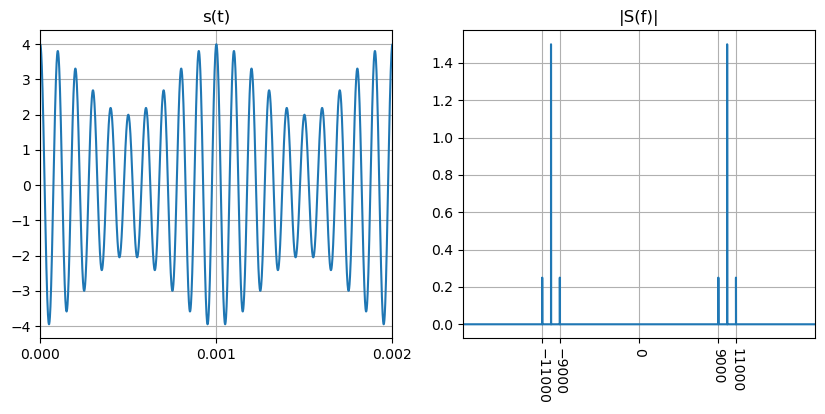

In [26]:
s_t = m_t * c_t
S_f = np.fft.fftshift(np.fft.fft(s_t) / len(s_t))

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, s_t)
plt.title("s(t)")
plt.grid()
plt.xlim(0, 2 * (1 / fm))
plt.xticks([0, 1 / fm, 2 / fm])

plt.subplot(122)
plt.plot(f, np.abs(S_f))
plt.title("|S(f)|")
plt.grid()
plt.xlim(-2 * fc, 2 * fc)
plt.xticks([-fc - fm, -fc + fm, 0, fc - fm, fc + fm], rotation=-90)

plt.show()

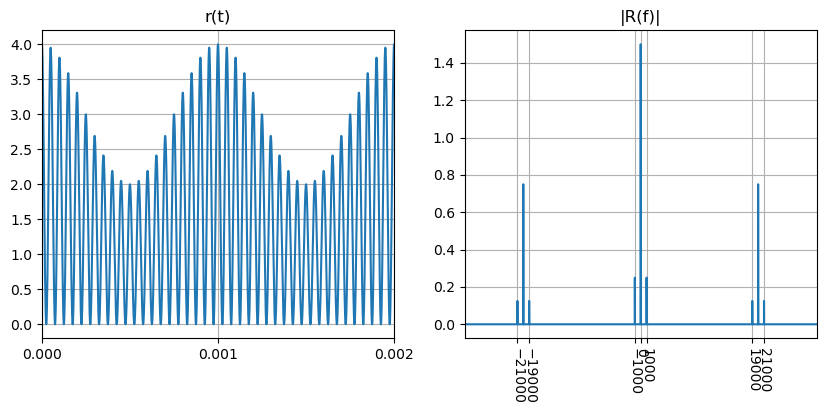

In [27]:
r_t = s_t * c_t
R_f = np.fft.fftshift(np.fft.fft(r_t) / len(r_t))

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, r_t)
plt.title("r(t)")
plt.grid()
plt.xlim(0, 2 * (1 / fm))
plt.xticks([0, 1 / fm, 2 / fm])

plt.subplot(122)
plt.plot(f, np.abs(R_f))
plt.title("|R(f)|")
plt.grid()
plt.xlim(-3 * fc, 3 * fc)
plt.xticks(
    [-2 * fc - fm, -2 * fc + fm, -fm, 0, +fm, 2 * fc - fm, 2 * fc + fm], rotation=-90
)


plt.show()

512


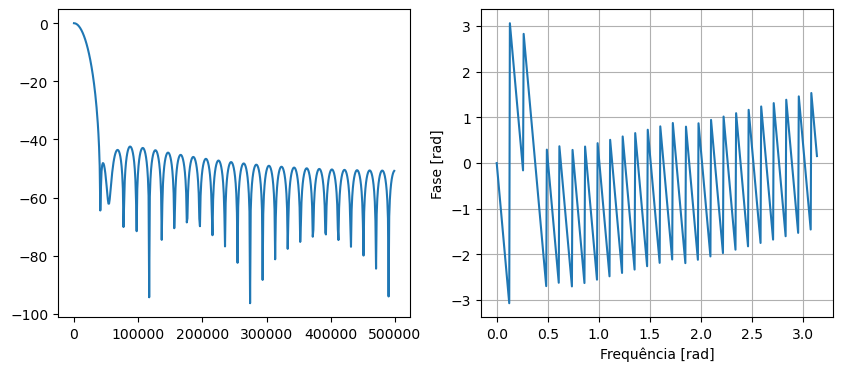

In [70]:
f_cut = int(2e3)

# create a low pass filter with cutoff frequency at 2kHz using 50th order FIR filter and freqz
b = signal.firwin(51, f_cut, fs=fs)
w, h = signal.freqz(b, 1)

print(len(w))
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(w * fs / (2 * np.pi), 20 * np.log10(np.abs(h)))

plt.subplot(122)
plt.plot(w, np.angle(h))
plt.grid()
plt.xlabel("Frequência [rad]")
plt.ylabel("Fase [rad]")

plt.show()

/home/gabrielluizdep/miniconda3/envs/eng/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/gabrielluizdep/miniconda3/envs/eng/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


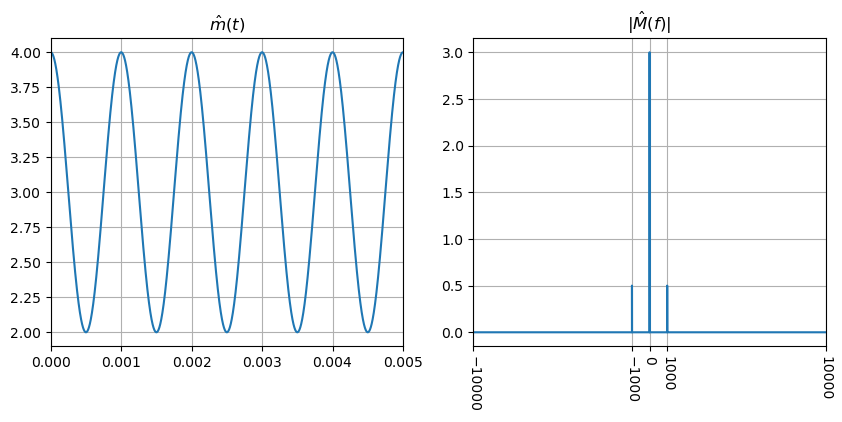

In [29]:
filtro_pb = np.concatenate(
    (np.zeros(int(fs / 2 - f_cut)), np.ones(f_cut * 2), np.zeros(int(fs / 2 - f_cut)))
)

M_f_hat = 2 * R_f * filtro_pb
m_t_hat = np.fft.ifft(np.fft.ifftshift(M_f_hat)) * len(M_f_hat)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, m_t_hat)
plt.title("$\hat{m}(t)$")
plt.grid()
plt.xlim(0, 5 * (1 / fm))
plt.xticks([0, 1 / fm, 2 / fm, 3 / fm, 4 / fm, 5 / fm])

plt.subplot(122)
plt.plot(f, np.real(M_f_hat))
plt.title("$|\hat{M}(f)|$")
plt.grid()
plt.xlim(-fc, fc)
plt.xticks([-fc, -fm, 0, fm, fc], rotation=-90)

plt.show()

50
1024 1024


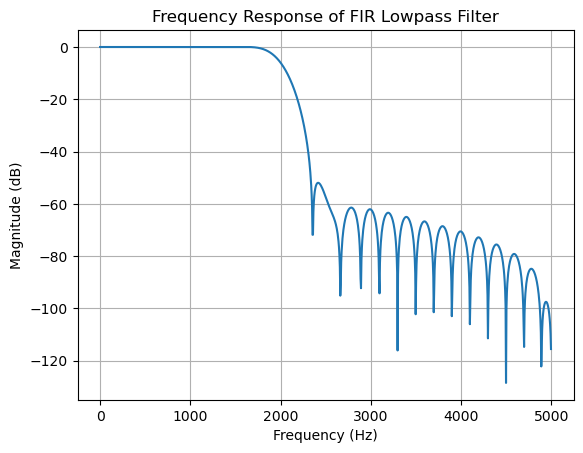

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Define filter parameters
N = 50  # Filter order
Fs = 10000  # Sampling frequency in Hz
Fc = 2000  # Cutoff frequency in Hz

# Normalize cutoff frequency to Nyquist frequency
nyquist = 0.5 * Fs
normalized_cutoff = Fc / nyquist

# Design the FIR filter using firwin
b = firwin(N, normalized_cutoff)
print(len(b))

# Plot the frequency response of the filter
w, h = freqz(b, 1, worN=1024)
print(len(w), len(h))
magnitude = 20 * np.log10(abs(h))

# Plot frequency response
plt.figure()
plt.plot(w / np.pi * nyquist, magnitude)
plt.title("Frequency Response of FIR Lowpass Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()